## **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data**

In [2]:
telecom_customer = pd.read_csv("https://raw.githubusercontent.com/TeamEpicProjects/Customer-Churn-Prediction/main/data/1/TelcoCustomerChurn.csv")

## **Data Inspecting**

**Display first 5 rows of data**

In [3]:
telecom_customer.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,No,Yes,Yes,67.0,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,No,53.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,NaN,No,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,No,No,No,48.0,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,Yes,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,No,Yes,Yes,57.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0


**Information related to dataset**

In [4]:
telecom_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4687 non-null   object 
 1   Count              4691 non-null   float64
 2   Country            4708 non-null   object 
 3   State              4715 non-null   object 
 4   City               4688 non-null   object 
 5   Zip Code           4698 non-null   float64
 6   Lat Long           4713 non-null   object 
 7   Latitude           4695 non-null   float64
 8   Longitude          4685 non-null   float64
 9   Gender             4698 non-null   object 
 10  Senior Citizen     4711 non-null   object 
 11  Partner            4678 non-null   object 
 12  Dependents         4672 non-null   object 
 13  Tenure Months      4704 non-null   float64
 14  Phone Service      4692 non-null   object 
 15  Multiple Lines     4696 non-null   object 
 16  Internet Service   4692 

* Total Charges should be in float64 instead of object
* All features contains null values

**Converting Total Charges into numeric data type**

In [5]:
telecom_customer['Total Charges'] = pd.to_numeric(telecom_customer['Total Charges'],errors="coerce")

**Checking Null Values**

In [6]:
telecom_customer.isnull().sum()

CustomerID             31
Count                  27
Country                10
State                   3
City                   30
Zip Code               20
Lat Long                5
Latitude               23
Longitude              33
Gender                 20
Senior Citizen          7
Partner                40
Dependents             46
Tenure Months          14
Phone Service          26
Multiple Lines         22
Internet Service       26
Online Security        44
Online Backup           4
Device Protection       7
Tech Support           23
Streaming TV           32
Streaming Movies       30
Contract               46
Paperless Billing      24
Payment Method          1
Monthly Charges         4
Total Charges          23
CLTV                   26
Churn Reason         3457
Churn Value            25
dtype: int64

**Unique Value of each feature in the dataset**

In [7]:
telecom_customer.nunique()


CustomerID           4687
Count                   1
Country                 1
State                   1
City                 1117
Zip Code             1633
Lat Long             1633
Latitude             1632
Longitude            1632
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1421
Total Charges        4462
CLTV                 2807
Churn Reason           20
Churn Value             2
dtype: int64

* Count, Country and State have only 1 unique value, no relevant contribution in our analysis so drop it.
* CustomerID is also not required for our analysis so we have to drop it.
* Latitude & Longitude is not required as we already have Lat Long,so drop them.

**Dropping Unnecessary Columns**

In [8]:
telecom_customer.drop(['CustomerID','Count','Country','State','Latitude','Longitude'],axis=1,inplace=True)
telecom_customer

,City,Zip Code,Lat Long,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,Paso Robles,93446.0,"35.634222, -120.728341",Male,No,Yes,Yes,67.0,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,Los Angeles,90005.0,"34.059281, -118.30742",Female,No,No,No,53.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,NaN,No,No,Month-to-month,No,Electronic check,90.80,4921.20,5249.0,NaN,0.0
2,Potrero,91963.0,"32.619465, -116.593605",Male,No,No,No,48.0,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,Palmdale,93551.0,"34.613476, -118.256358",Male,Yes,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,Hood,95639.0,"38.375325, -121.507935",Male,No,Yes,Yes,57.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,Orange,92866.0,"33.784597, -117.844535",Female,No,No,No,15.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.10,302.45,4359.0,NaN,0.0
4714,San Francisco,94107.0,"37.768881, -122.395521",Female,No,Yes,Yes,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),99.00,7061.65,4305.0,NaN,0.0
4715,San Dimas,91773.0,"34.102119, -117.815532",Male,No,Yes,No,3.0,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.15,99.75,2987.0,Attitude of support person,1.0
4716,Klamath River,96050.0,"41.816595, -122.948287",Female,No,Yes,No,17.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95,5160.0,Moved,1.0


* Zip Code, Tenure Months and Churn Value are having integer values but their type is float64

**Convert Zip Code, Tenure Months and Churn Value into int64**

In [9]:
telecom_customer[['Zip Code','Tenure Months','Churn Value']] = telecom_customer[['Zip Code','Tenure Months','Churn Value']].astype('Int64')
telecom_customer

,City,Zip Code,Lat Long,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,Paso Robles,93446,"35.634222, -120.728341",Male,No,Yes,Yes,67,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0
1,Los Angeles,90005,"34.059281, -118.30742",Female,No,No,No,53,Yes,Yes,Fiber optic,Yes,Yes,Yes,NaN,No,No,Month-to-month,No,Electronic check,90.80,4921.20,5249.0,NaN,0
2,Potrero,91963,"32.619465, -116.593605",Male,No,No,No,48,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0
3,Palmdale,93551,"34.613476, -118.256358",Male,Yes,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0
4,Hood,95639,"38.375325, -121.507935",Male,No,Yes,Yes,57,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,Orange,92866,"33.784597, -117.844535",Female,No,No,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.10,302.45,4359.0,NaN,0
4714,San Francisco,94107,"37.768881, -122.395521",Female,No,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),99.00,7061.65,4305.0,NaN,0
4715,San Dimas,91773,"34.102119, -117.815532",Male,No,Yes,No,3,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.15,99.75,2987.0,Attitude of support person,1
4716,Klamath River,96050,"41.816595, -122.948287",Female,No,Yes,No,17,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95,5160.0,Moved,1


**Categorical Features & Numeric Features**

In [10]:
cat_features = telecom_customer.select_dtypes(include=['object'])
cat_features.columns

Index(['City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn Reason'],
      dtype='object')

In [11]:
num_features= telecom_customer.select_dtypes(include=['float64','int64'])
num_features.columns

Index(['Zip Code', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV',
       'Churn Value'],
      dtype='object')

**Statistical Description of numeric Features**

* Zip Code  does not follow any statistics relevant to our analysis so we didn't include them.
* Churn Value will not include in statistical measures as it represents only 2 values.

In [12]:
num_stats_features=num_features.drop(['Zip Code','Churn Value'],axis=1)
num_stats_features.head()

,Tenure Months,Monthly Charges,Total Charges,CLTV
0,67,60.05,3994.05,6148.0
1,53,90.80,4921.20,5249.0
2,48,78.75,3682.45,2257.0
3,1,70.05,70.05,2469.0
4,57,74.30,4018.35,4133.0


In [13]:
round(num_stats_features.describe(),2)

,Tenure Months,Monthly Charges,Total Charges,CLTV
count,4704.00,4714.00,4695.00,4692.00
mean,32.73,64.89,2311.05,4406.63
std,24.61,30.14,2281.13,1187.67
min,0.00,18.25,18.85,2003.00
25%,9.00,35.46,412.33,3477.50
50%,30.00,70.38,1424.60,4533.00
75%,56.00,89.95,3877.08,5402.25
max,72.00,118.75,8684.80,6499.00


* Mean Value of monthly charges is 64.88 but 25% customers pay more than 89.95

In [14]:
telecom_customer['Churn Value']=telecom_customer['Churn Value'].map({0:'No',1:'Yes'})

In [15]:
telecom_customer['Churn Value'].unique()

array(['No', 'Yes', nan], dtype=object)

* Customer with Month-to-month contract are having less monthly charge likely than One Year & Two Year contract as customer
* Customer with Month-to-month have less possibility of churn.
* Churn is high when monthly charges are high.

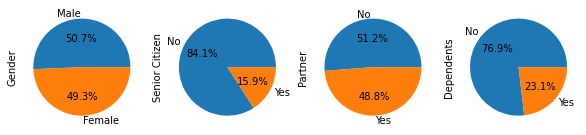

In [16]:
f,axes = plt.subplots(1,4,figsize=(10,12))
telecom_customer['Gender'].value_counts().plot(kind='pie',ax=axes[0],autopct='%1.1f%%')
telecom_customer['Senior Citizen'].value_counts().plot(kind='pie',ax=axes[1],autopct='%1.1f%%')
telecom_customer['Partner'].value_counts().plot(kind='pie',ax=axes[2],autopct='%1.1f%%')
telecom_customer['Dependents'].value_counts().plot(kind='pie',ax=axes[3],autopct='%1.1f%%')

* Male and Female have almost equal proportion
* Most of the customers are younger in age due to less contribution of Senior Citizen
* Almost Half of them have Partners
* Most of the Customers don't have dependents

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

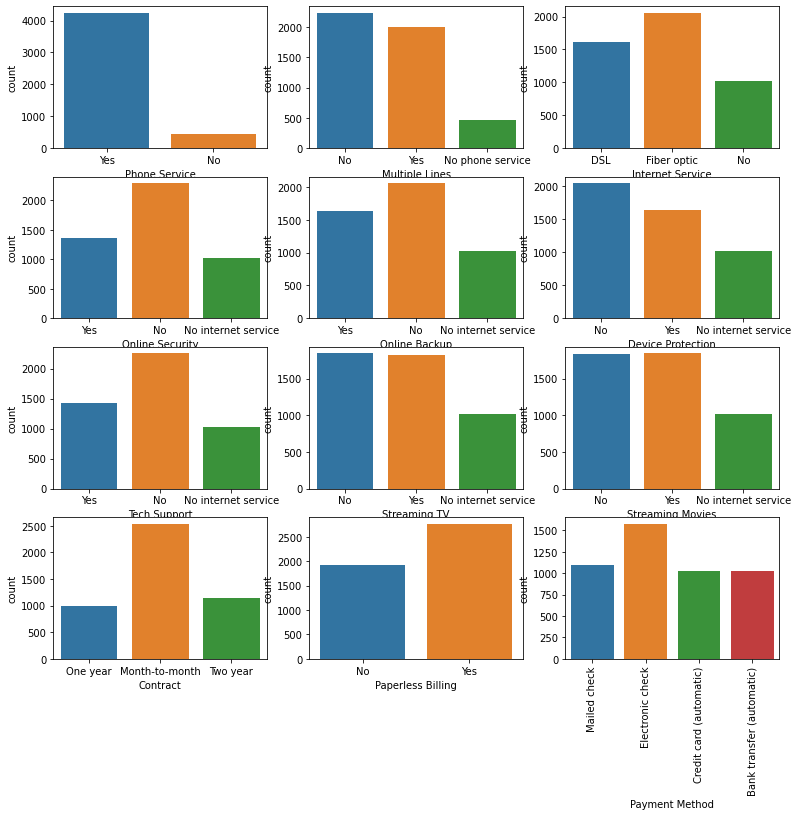

In [17]:
f,axes = plt.subplots(4,3,figsize=(13,12)) 
sns.countplot(data=telecom_customer,x='Phone Service', ax = axes[0,0])
sns.countplot(data=telecom_customer,x='Multiple Lines', ax = axes[0,1])
sns.countplot(data=telecom_customer,x='Internet Service', ax = axes[0,2])
sns.countplot(data=telecom_customer,x='Online Security', ax = axes[1,0])
sns.countplot(data=telecom_customer,x='Online Backup', ax = axes[1,1])
sns.countplot(data=telecom_customer,x='Device Protection', ax = axes[1,2])
sns.countplot(data=telecom_customer,x='Tech Support', ax = axes[2,0])
sns.countplot(data=telecom_customer,x='Streaming TV', ax = axes[2,1])
sns.countplot(data=telecom_customer,x='Streaming Movies', ax = axes[2,2])
sns.countplot(data=telecom_customer,x='Contract', ax = axes[3,0])
sns.countplot(data=telecom_customer,x='Paperless Billing', ax = axes[3,1])
sns.countplot(data=telecom_customer,x='Payment Method', ax = axes[3,2])
plt.xticks(rotation=90)

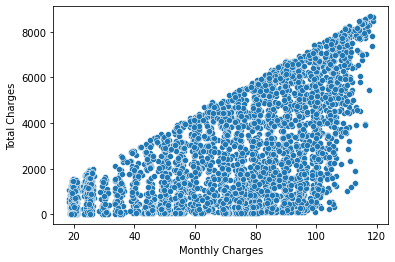

In [18]:
sns.scatterplot(data=telecom_customer,y='Total Charges',x='Monthly Charges')

* Total Charges Increases as Monthly Charges Increases

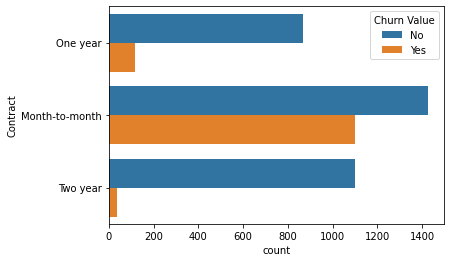

In [19]:
sns.countplot(data=telecom_customer,y='Contract',hue='Churn Value')


* Month-to-Month Contract Customer are mostly churn

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

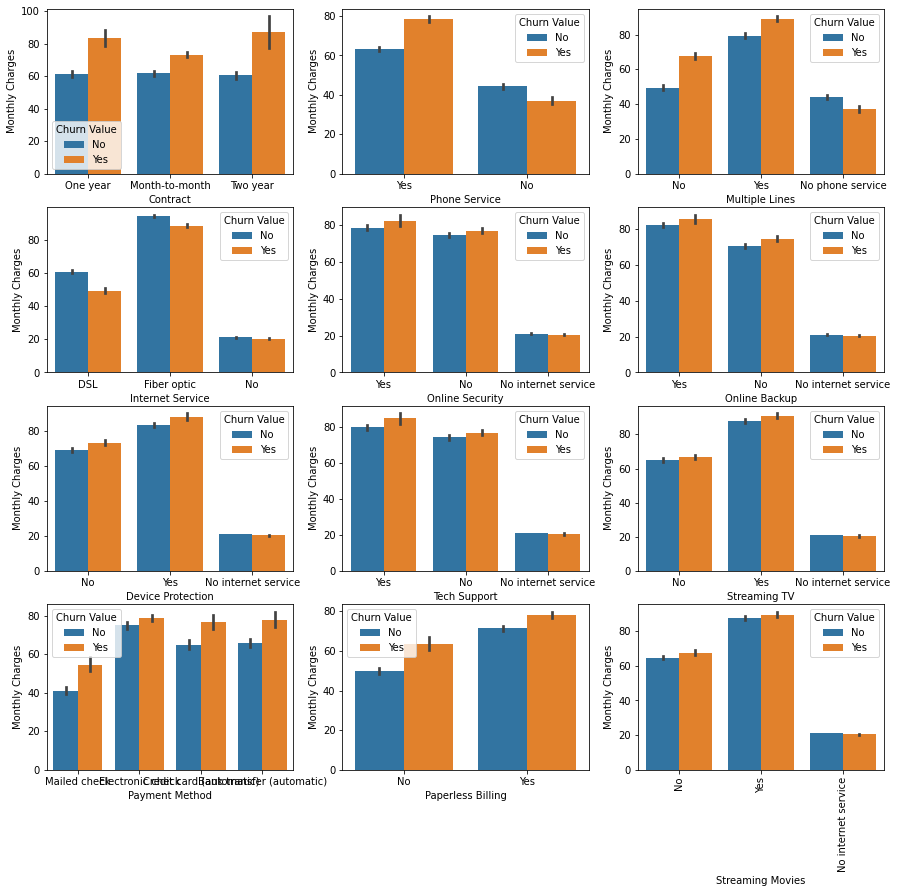

In [20]:
f,axes = plt.subplots(4,3,figsize=(15,14)) 
sns.barplot(x='Contract', y='Monthly Charges', data=telecom_customer, hue='Churn Value',ax = axes[0,0])
sns.barplot(x='Phone Service', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[0,1])
sns.barplot(x='Multiple Lines', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[0,2])
sns.barplot(x='Internet Service', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[1,0])
sns.barplot(x='Online Security', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[1,1])
sns.barplot(x='Online Backup', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[1,2])
sns.barplot(x='Device Protection', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[2,0])
sns.barplot(x='Tech Support', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[2,1])
sns.barplot(x='Streaming TV', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[2,2])
sns.barplot(x='Payment Method', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[3,0])
sns.barplot(x='Paperless Billing', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[3,1])
sns.barplot(x='Streaming Movies', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[3,2])
plt.xticks(rotation=90)